<a href="https://www.kaggle.com/code/abedalqaderalkhatib/notebook3d157d855c?scriptVersionId=94435326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Visualization 

## Visualization of planet detection methods data

##  Dataset Name: [Planets Data - Searbon](https://github.com/mwaskom/seaborn-data/blob/master/planets.csv)



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:


planets_df = pd.read_csv('../input/planets-csv/planets.csv', sep=',')
print ('___________________head_______________\n\n')
print (planets_df.head(10))
print ('___________________tail_______________\n\n')
print (planets_df.tail(10))

___________________head_______________


            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
5  Radial Velocity       1         185.840   4.80     76.39  2008
6  Radial Velocity       1        1773.400   4.64     18.15  2002
7  Radial Velocity       1         798.500    NaN     21.41  1996
8  Radial Velocity       1         993.300  10.30     73.10  2008
9  Radial Velocity       2         452.800   1.99     74.79  2010
___________________tail_______________


       method  number  orbital_period  mass  distance  year
1025  Transit       1        3.067850   NaN      60.0  2012
1026  Transit       1        0.925542   NaN     470.0  2014
1027  Imagin

### Compare between different methods of detecting planets in terms of:

- Number of planets orbiting around a star
- Orbital_period, mass, distance of planets
- The popularity of each method.

In [3]:
sns.set(rc={'figure.figsize':(20,10)})


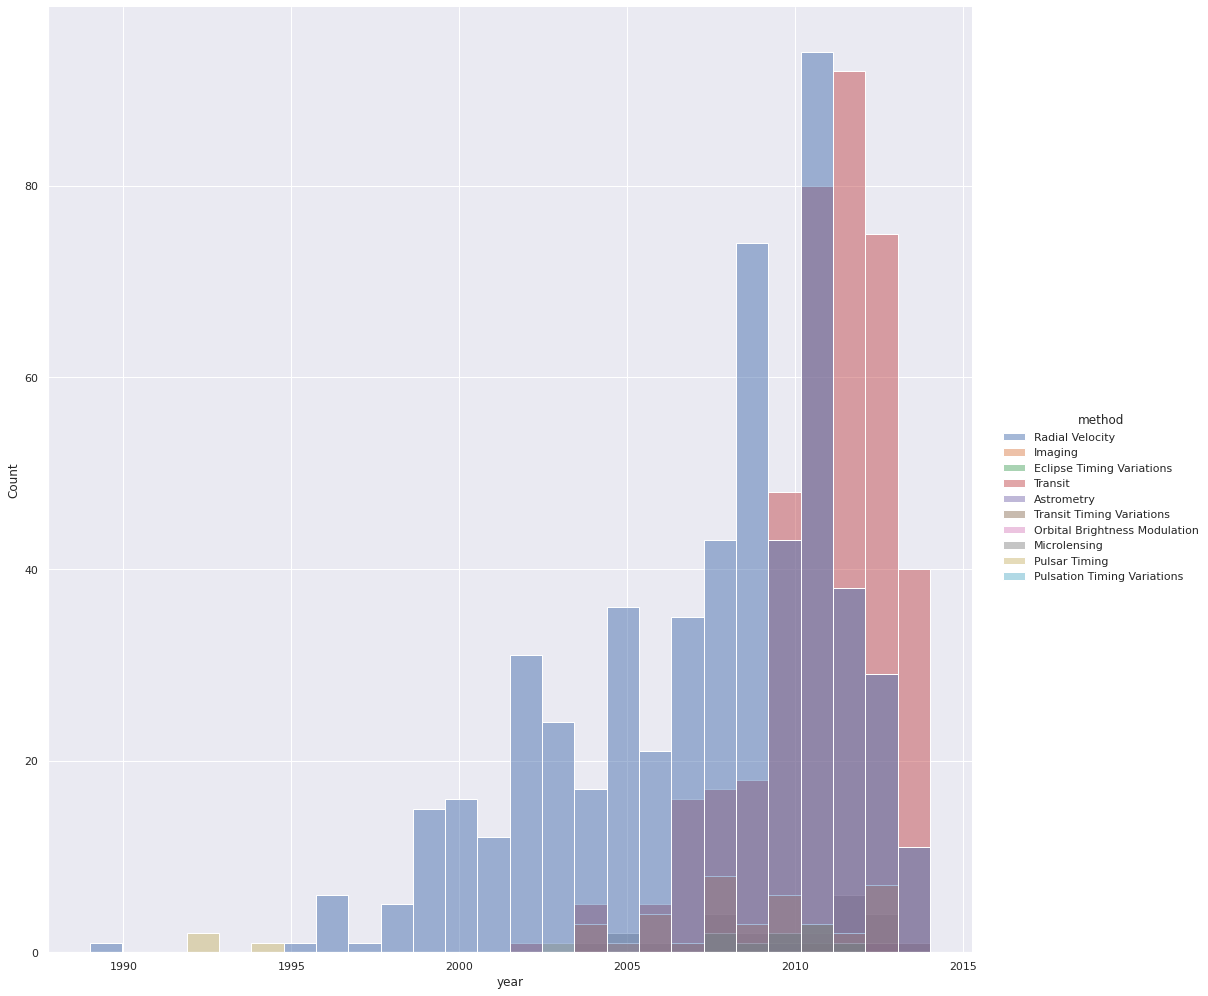

In [4]:
# g = sns.FacetGrid(planets_df, col="method")
sns.displot(planets_df, x="year", hue = "method", height = 14)

### Conclude from the grapgh above the follwoing :

- the exoplanets discovery has drastically increased over the years.
- the most popular methods of discovery are: radial velocity, transit and microlincing.
- the transit method has became more popular in the last years, between 2010 and 2014, while radial velocity has been significantly more popular before that period.



In [5]:
planets_df["number"].value_counts()


1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [6]:
number_of_planets = pd.DataFrame(planets_df[["method","number"]].value_counts())
number_of_planets = number_of_planets.reset_index()
number_of_planets.columns = ['method', 'number', 'Counts of planets discovered']
print(number_of_planets.head())

            method  number  Counts of planets discovered
0  Radial Velocity       1                           328
1          Transit       1                           205
2  Radial Velocity       2                           132
3          Transit       2                           112
4  Radial Velocity       3                            53


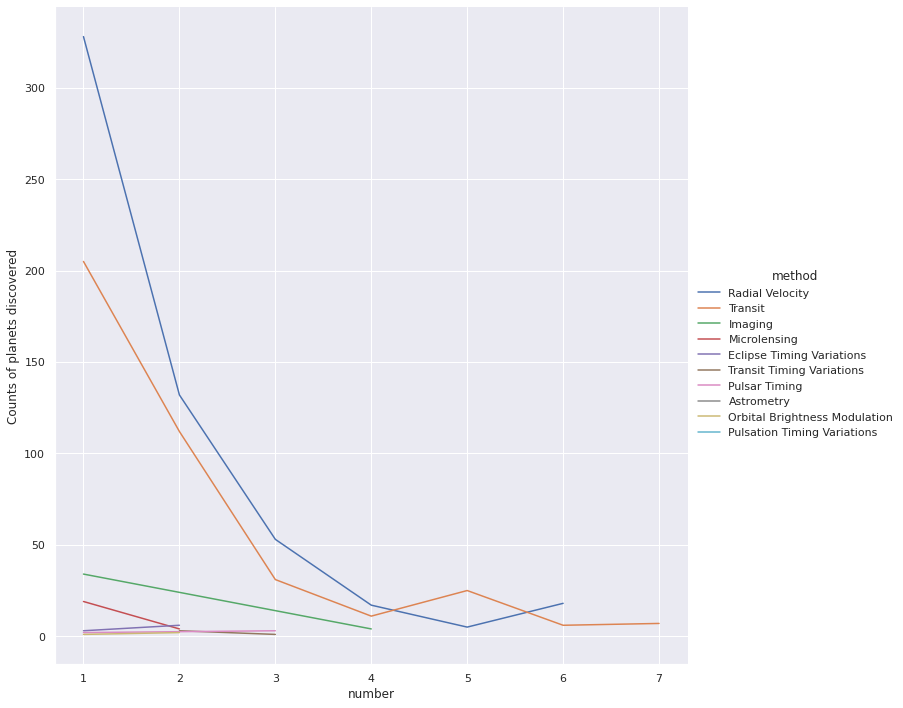

In [7]:
sns.relplot(data=number_of_planets, x="number", y="Counts of planets discovered",hue = "method",kind="line", height=10) 


 > on the x axes of the graph above there is the number of planets discovered in each record. sometimes there can be found more than one planet orbiting around a star, but as we can see in the graph above, those become less popular as the number increases.

In [8]:
mass_distance_df = planets_df.loc[planets_df['method'] == 'Radial Velocity' , ["orbital_period", "method", "mass","distance"]]
mass_distance_df = mass_distance_df.loc[mass_distance_df["mass"].isnull() == False ,  [ "orbital_period","method","mass","distance"]]
mass_distance_df = mass_distance_df.loc[mass_distance_df["orbital_period"] < 3000 ,  [ "orbital_period","method","mass","distance"]]


In [9]:
mass_distance_df


,orbital_period,method,mass,distance
0,269.300,Radial Velocity,7.100,77.40
1,874.774,Radial Velocity,2.210,56.95
2,763.000,Radial Velocity,2.600,19.84
3,326.030,Radial Velocity,19.400,110.62
4,516.220,Radial Velocity,10.500,119.47
...,...,...,...,...
784,580.000,Radial Velocity,0.947,135.00
913,677.800,Radial Velocity,19.800,NaN
914,6.958,Radial Velocity,0.340,NaN
915,5.118,Radial Velocity,0.400,NaN


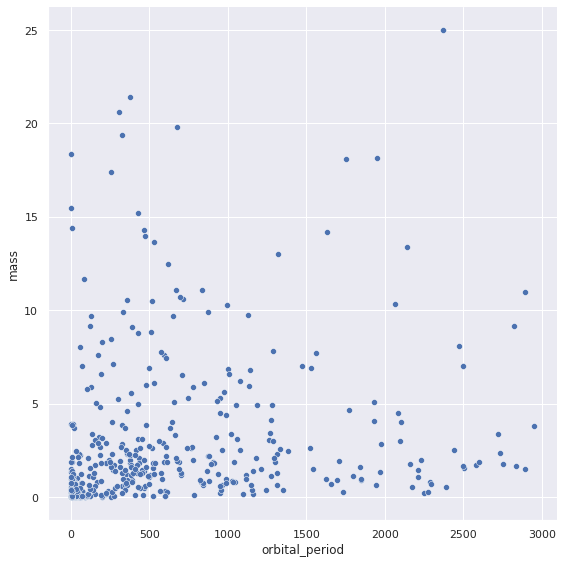

In [10]:
sns.relplot(data=mass_distance_df, x="orbital_period", y="mass",kind="scatter", height=8) 


according to the graph above, there seems to be no correlation between the mass and the orbital period of the planets discovered, which is counter intuitive.


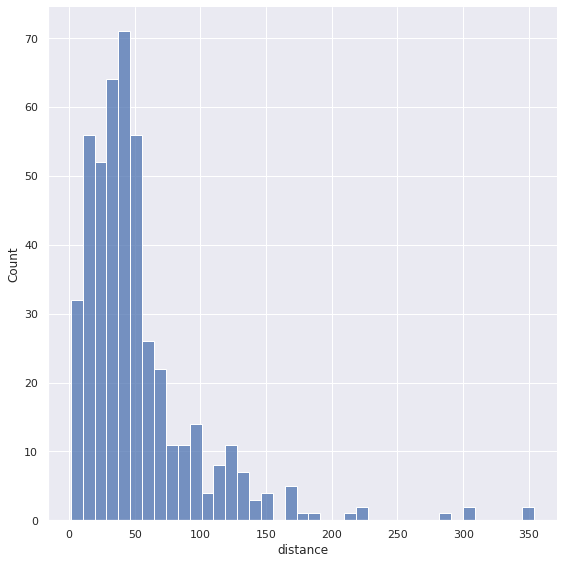

In [11]:
sns.displot(mass_distance_df, x="distance", height = 8)


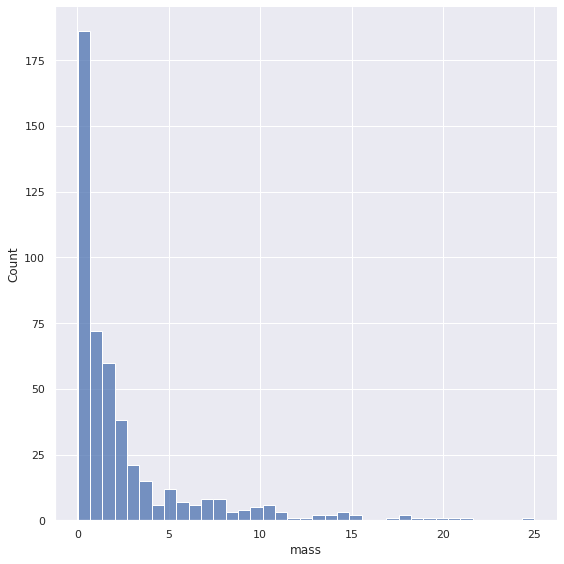

In [12]:
sns.displot(mass_distance_df, x="mass", height = 8)


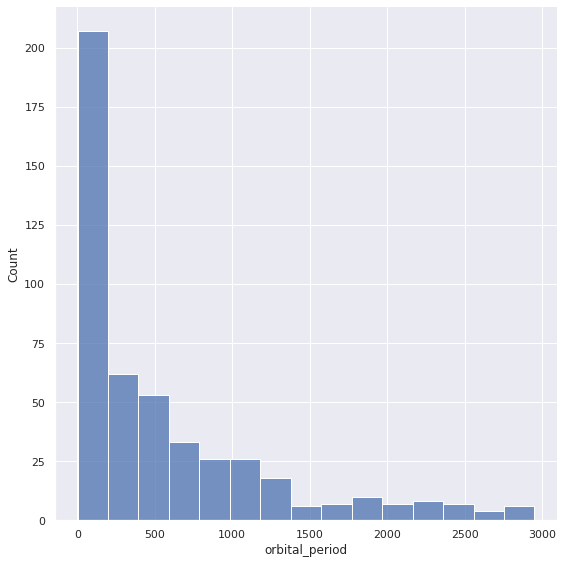

In [13]:
sns.displot(mass_distance_df, x="orbital_period", height = 8)


Finally, we can conclude from the two graphs above that it might be easier to discover "lighter", "closer", and "smaller orbit" planets.


## Conclusion 
- exo planets discovery has drastically increased in the last 20 years
- there are more single planets discovered than multiple planets, and the counts decrease with the number
- it might be easier to discover "lighter", "closer", and "smaller orbit" planets.